Regresión Lineal

In [113]:
# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Librerias para implementar ciencias de datos
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline



In [32]:
#semilla para reproducirla
df = pd.read_csv("C:/Users/PERSONAL/Documents/CAR DETAILS FROM CAR DEKHO.csv") #Lectura de datos en Phyton 

In [35]:
df.head(30)#Lesctura de los datos

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [12]:
df.describe()#Descripción de los datos

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


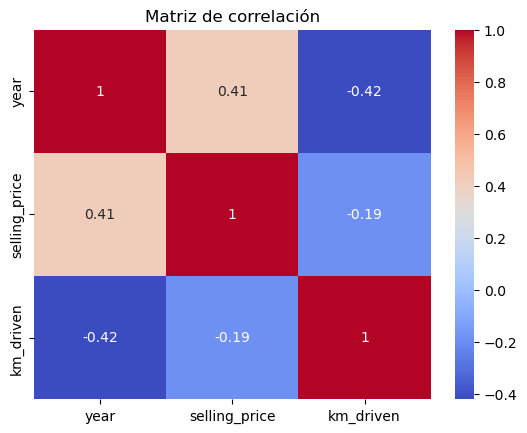

In [14]:
# Correlación entre variables numéricas
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

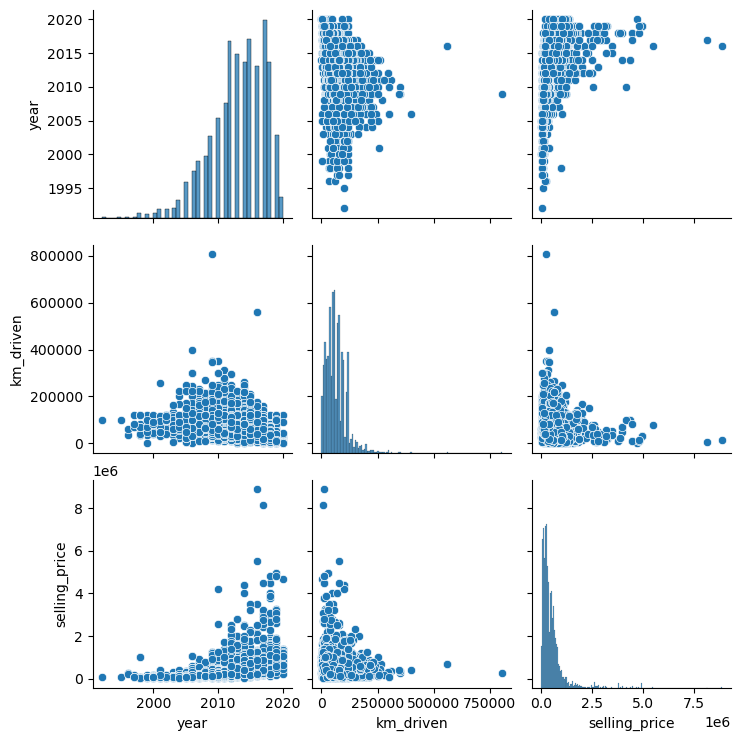

In [16]:
# Gráficas exploratorias
sns.pairplot(df[['year', 'km_driven', 'selling_price']])
plt.show()

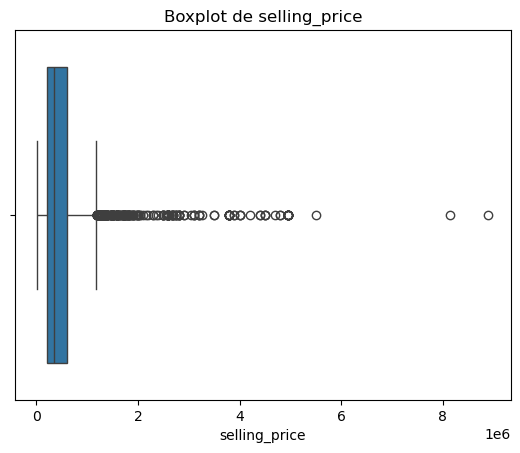

In [18]:
# Boxplot para identificar valores atípicos
sns.boxplot(x=df['selling_price'])
plt.title("Boxplot de selling_price")
plt.show()

2. Procesamiento de datos

In [22]:
# Eliminar duplicados si hay
df = df.drop_duplicates()


In [24]:
# Verificar valores únicos
print(df['fuel'].unique())
print(df['owner'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [26]:
# Codificar variables categóricas (One-hot encoding)
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

In [28]:
# Confirmar que no haya valores faltantes
print(df.isnull().sum())

name                            0
year                            0
selling_price                   0
km_driven                       0
fuel_Diesel                     0
fuel_Electric                   0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Manual             0
owner_Fourth & Above Owner      0
owner_Second Owner              0
owner_Test Drive Car            0
owner_Third Owner               0
dtype: int64


3. Selección de características más relevantes

In [41]:
df['selling_price'].value_counts()# Entrenar el modelo con precio del carro

selling_price
300000     162
250000     125
350000     122
550000     107
600000     103
          ... 
2100000      1
828999       1
1119000      1
746000       1
865000       1
Name: count, Length: 445, dtype: int64

4. División del dataset en Train y Test

In [88]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
print (X_train)

                                             name  year  km_driven    fuel  \
227                     Mahindra Scorpio S11 BSIV  2017      20000  Diesel   
964                        Maruti Swift Dzire VDI  2018      50000  Diesel   
2045                          Maruti Alto 800 LXI  2013      25000  Petrol   
1025                     Chevrolet Beat Diesel LS  2011      70000  Diesel   
4242              Maruti Vitara Brezza LDi Option  2017      72000  Diesel   
...                                           ...   ...        ...     ...   
3444  Toyota Innova 2.5 G (Diesel) 8 Seater BS IV  2006      50000  Diesel   
466                Tata Indica Vista Quadrajet LX  2011      80000  Diesel   
3092                    Maruti Ciaz VDi Plus SHVS  2016      51000  Diesel   
3772                            Maruti Ertiga VDI  2013      80000  Diesel   
860                   Hyundai Santro Xing GL Plus  2013      80000  Petrol   

     seller_type transmission         owner  
227   Individual 

In [92]:
print (X_test)


                                 name  year  km_driven    fuel  \
3978  Tata Manza Aqua Quadrajet BS IV  2010      80000  Diesel   
1448            Renault KWID RXT BSIV  2019      27000  Petrol   
2664      Hyundai Santro Xing GL Plus  2008      41723  Petrol   
17              Honda Amaze VX i-DTEC  2014     141000  Diesel   
1634          Mahindra TUV 300 T8 AMT  2016      60000  Diesel   
...                               ...   ...        ...     ...   
3468         Maruti Wagon R LXI Minor  2007      60000  Petrol   
3164               Maruti Celerio ZDi  2015     120000  Diesel   
416                   Maruti Ritz VDi  2011      40000  Diesel   
1616         Toyota Etios Liva 1.2 VX  2017       6480  Petrol   
2480           Maruti Wagon R ZXI 1.2  2019      30000  Petrol   

           seller_type transmission         owner  
3978        Individual       Manual   First Owner  
1448        Individual       Manual   First Owner  
2664        Individual       Manual  Second Owner  

In [62]:
print(X.shape)
print(y.shape)

(4340, 7)
(4340,)


5.Entrenar el modelo configurado los diferentes hiperparámetros

In [84]:

# Inicializar modelo
# Crear modelo de regresión lineal SIN parámetros deprecated
modelo_regresion = LinearRegression()  # No le pases normalize ni otros parámetros innecesarios



In [110]:
# 1. Eliminar columnas no útiles
X_train_clean = X_train.drop(columns=['name'])

# 2. Definir columnas
numeric_features = ['year', 'km_driven']
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']

# 3. Preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 4. Crear y entrenar pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train_clean, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['year', 'km_driven']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['fuel', 'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('regressor', LinearRegression())])

6.  Evaluar el desempeño del modelo

In [116]:
y_pred = model.predict(X_test)

In [118]:
# R² Score (bondad del ajuste)

#MSE (error cuadrático medio)

#MAE (error absoluto medio)

In [120]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.4031303601432136
MSE: 182146878750.2804
MAE: 221706.36930929852


El Error Cuadrático Medio (MSE) penaliza fuertemente los errores grandes.

El Error Absoluto Medio (MAE) es la media de las diferencias absolutas entre lo predicho y lo real. Es una métrica más interpretable. En promedio, el modelo se equivoca en unos $221.700 por predicción.

El R² (coeficiente de determinación) indica qué proporción de la variabilidad de los precios reales puede ser explicada por el modelo.  El modelo explica el 40.3% de la variabilidad en el precio. Esto no está mal para una primera regresión lineal, pero sugiere que hay margen de mejora.

7. Visualización de resultados

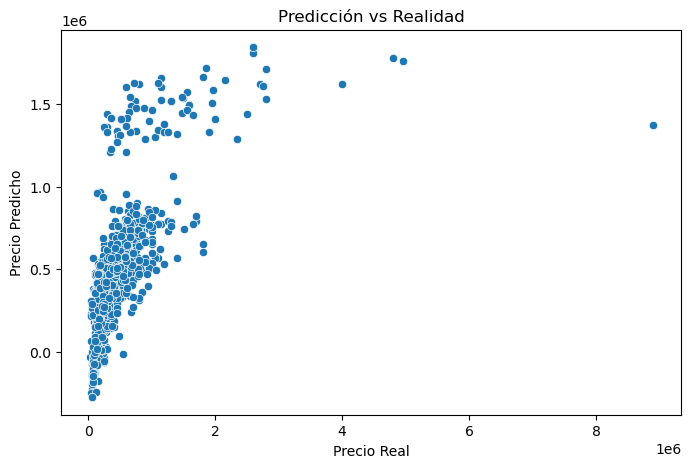

In [123]:
# Comparación entre valores reales y predichos
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Predicción vs Realidad")
plt.show()

Hay una clara concentración de puntos en la parte baja izquierda, lo que indica que el modelo está prediciendo razonablemente bien para los precios más bajos.Hay una tendencia ascendente: a medida que el precio real aumenta, el precio predicho también aumenta.

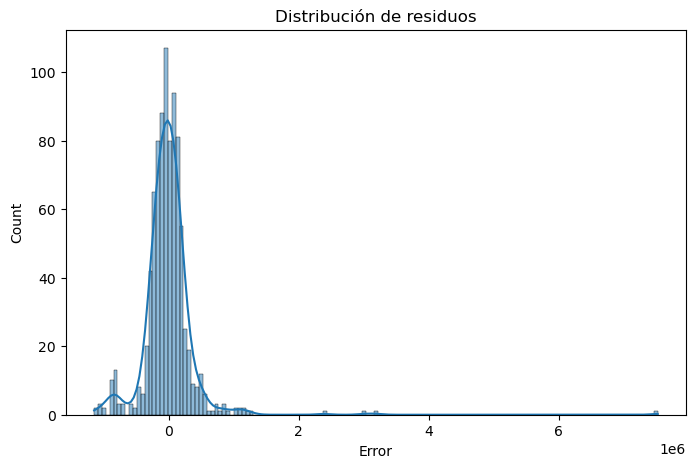

In [125]:
# Gráfico de residuos
residuos = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuos, kde=True)
plt.title("Distribución de residuos")
plt.xlabel("Error")
plt.show()